### 13.2 PCA

- 优点：降低数据复杂性，识别最重要的多个特征
- 缺点：不一定需要，且可能损失有用信息

In [2]:
import numpy as np

In [3]:
def loadDataSet(fileName, delim='\t'):
    """
    从文件中加载数据集
    :param fileName: 文件名
    :param delim: 分隔符，默认为制表符
    :return: 数据集
    """
    with open(fileName) as fr:
        stringArr = [line.strip().split(delim) for line in fr.readlines()] # 读取文件并按行分割
        dataArr = [list(map(float, line)) for line in stringArr] # 将字符串转换为浮点数
        
    return np.mat(dataArr)

In [5]:
def pca(dataMat, topNfeat=9999999):
    """
    主成分分析
    :param dataMat: 数据矩阵
    :param topNfeat: 选择的主成分数目
    :return: 降维后的数据矩阵，重构后的数据矩阵
    """
    # 计算协方差矩阵
    meanVals = np.mean(dataMat, axis=0) # 计算均值
    meanRemoved = dataMat - meanVals # 去均值
    
    '''
    方差: （一维）度量两个随机变量关系的统计量
    协方差:  （二维）度量各个维度偏离其均值的程度
    协方差矩阵: （多维）度量各个维度偏离其均值的程度

    当cov(X, Y)>0时，表明X与Y正相关；(X越大，Y也越大；X越小Y，也越小。这种情况，我们称为“正相关”。)
    当cov(X, Y)<0时，表明X与Y负相关；
    当cov(X, Y)=0时，表明X与Y不相关。
    '''
    covMat = np.cov(meanRemoved, rowvar=0) # 计算协方差矩阵
    
    # 特征值分解
    eigVals, eigVects = np.linalg.eig(np.mat(covMat)) # 特征值和特征向量
    eigValInd = np.argsort(eigVals)[:-(topNfeat+1):-1] # 排序并选择前topNfeat个特征值的索引
    redEigVects = eigVects[:, eigValInd] # 选择对应的特征向量
    
    lowDDataMat = meanRemoved * redEigVects # 降维后的数据矩阵
    reconMat = (lowDDataMat * redEigVects.T) + meanVals # 重构数据
    
    return lowDDataMat, reconMat

(1000, 2)


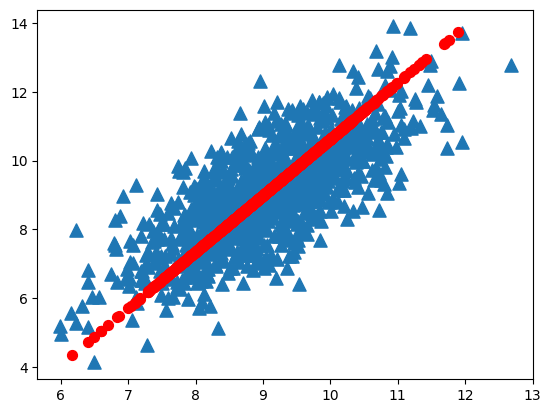

In [6]:
dataMat = loadDataSet('testSet.txt')
lowDDataMat, reconMat = pca(dataMat, 1) # 降维到1维

print(np.shape(dataMat))

import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()


### 13.3 Example: using PCA to reduce the dimensionality of semiconductor manufacturing data

In [7]:
def replaceNanWithMean(dataSet):
    """
    替换数据集中的NaN值
    :param dataSet: 数据集
    :return: 替换后的数据集
    """
    numFeat = np.shape(dataSet)[1] # 特征数
    for i in range(numFeat):
        meanVal = np.mean(dataSet[np.nonzero(~np.isnan(dataSet[:, i].A))[0], i]) # 计算均值
        dataSet[np.nonzero(np.isnan(dataSet[:, i].A))[0], i] = meanVal # 替换NaN值为均值
        
    return dataSet

In [10]:
dataMat = replaceNanWithMean(loadDataSet('secom.data', ' ')) # 替换NaN值
meanVals = np.mean(dataMat, axis=0) # 计算均值
meanRemoved = dataMat - meanVals # 去均值
covMat = np.cov(meanRemoved, rowvar=0) # 计算协方差矩阵
eigVals, eigVects = np.linalg.eig(np.mat(covMat)) # 特征值和特征向量
# print(eigVals)
eigValInd = np.argsort(eigVals) # 排序

topNfeat = 20 # 选择前20个特征值
redEigVects = eigVects[:, eigValInd[:-(topNfeat+1):-1]] # 选择对应的特征向量
cov_all_score = float(np.sum(eigVals)) # 所有特征值之和
sum_cov_score = 0 # 特征值之和
for i in range(0, len(eigValInd)):
    line_cov_score = float(eigVals[eigValInd[i]]) # 当前特征值
    sum_cov_score += line_cov_score # 特征值之和
    if i < topNfeat:
        print('第%d个特征值: %f, 占比: %f' % (i, line_cov_score, line_cov_score / cov_all_score))
    else:
        print('第%d个特征值: %f, 占比: %f' % (i, line_cov_score, line_cov_score / cov_all_score))

第0个特征值: -0.000000, 占比: -0.000000
第1个特征值: -0.000000, 占比: -0.000000
第2个特征值: -0.000000, 占比: -0.000000
第3个特征值: -0.000000, 占比: -0.000000
第4个特征值: 0.000000, 占比: 0.000000
第5个特征值: 0.000000, 占比: 0.000000
第6个特征值: 0.000000, 占比: 0.000000
第7个特征值: 0.000000, 占比: 0.000000
第8个特征值: 0.000000, 占比: 0.000000
第9个特征值: 0.000000, 占比: 0.000000
第10个特征值: 0.000000, 占比: 0.000000
第11个特征值: 0.000000, 占比: 0.000000
第12个特征值: 0.000000, 占比: 0.000000
第13个特征值: 0.000000, 占比: 0.000000
第14个特征值: 0.000000, 占比: 0.000000
第15个特征值: 0.000000, 占比: 0.000000
第16个特征值: 0.000000, 占比: 0.000000
第17个特征值: 0.000000, 占比: 0.000000
第18个特征值: 0.000000, 占比: 0.000000
第19个特征值: 0.000000, 占比: 0.000000
第20个特征值: 0.000000, 占比: 0.000000
第21个特征值: 0.000000, 占比: 0.000000
第22个特征值: 0.000000, 占比: 0.000000
第23个特征值: 0.000000, 占比: 0.000000
第24个特征值: 0.000000, 占比: 0.000000
第25个特征值: 0.000000, 占比: 0.000000
第26个特征值: 0.000000, 占比: 0.000000
第27个特征值: 0.000000, 占比: 0.000000
第28个特征值: 0.000000, 占比: 0.000000
第29个特征值: 0.000000, 占比: 0.000000
第30个特征值: 0.000000, 占比: 0.000000
第31个特征值: 0